In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('Stock_Dataa.csv',encoding='ISO-8859-1')

In [ ]:
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [ ]:
#get no.of rows and cols
df.shape

(4101, 27)

In [ ]:
headlines = []

for row in range(0,len(df.index)):
 headlines.append(' '.join( str(x) for x in df.iloc[row, 2:27]) )

In [ ]:
headlines[0]

"A 'hindrance to operations': extracts from the leaked reports Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed Russian roulette Sold out Recovering a title"

In [ ]:
clean_headlines = []

for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]",'', headlines[i]))
  clean_headlines[i] = re.sub('b[(")]','', clean_headlines[i])
  clean_headlines[i] = re.sub("\'",'', clean_headlines[i])

In [ ]:
clean_headlines[0]

'A hindrance to operations: extracts from the leaked reports Scorecard Hughes instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Evertons party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupars debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like its 1999 Wear wolves have turned into lambs Stump mike catches testy Goughs taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohls successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Dianas landmine crusade put Tories in a panic Yeltsins resignation caught opposition flat-footed Russian roulette Sold out Recovering a title'

In [ ]:
df['Combined_News'] = clean_headlines

df['Combined_News'][0]

'A hindrance to operations: extracts from the leaked reports Scorecard Hughes instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Evertons party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupars debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like its 1999 Wear wolves have turned into lambs Stump mike catches testy Goughs taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohls successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Dianas landmine crusade put Tories in a panic Yeltsins resignation caught opposition flat-footed Russian roulette Sold out Recovering a title'

In [ ]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,A hindrance to operations: extracts from the l...
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,Coventry caught on counter by Flo Uniteds riva...


In [ ]:
from pandas.io.formats.format import TextAdjustment
def getSubjectivity(text):
  return TextBlob(text).sentiment. subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Combined_News'].apply(getSubjectivity)
df['Polarity'] = df['Combined_News'].apply(getPolarity)

In [ ]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News,Subjectivity,Polarity
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,A hindrance to operations: extracts from the l...,0.443506,0.120671
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...,0.191667,0.030556
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,Coventry caught on counter by Flo Uniteds riva...,0.417778,0.348889


In [ ]:
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(df['Combined_News'])):
  SIA = getSIA(df['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
df['compound'] = compound
df['Negative'] = neg
df['Neutral'] = neu
df['Positive'] = pos

In [ ]:
df.head(4)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Russian roulette,Sold out,Recovering a title,A hindrance to operations: extracts from the l...,0.443506,0.120671,-0.8271,0.191,0.665,0.143
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...,0.191667,0.030556,-0.9834,0.265,0.637,0.098
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,Coventry caught on counter by Flo Uniteds riva...,0.417778,0.348889,0.7003,0.066,0.818,0.116
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,Pilgrim knows how to progress Thatcher facing ...,0.289015,0.013907,-0.9032,0.214,0.624,0.162


In [ ]:
keep_columns = [ 'Subjectivity', 'Polarity',  'Negative', 'Neutral', 'Positive', 'Label']
df1 = df[keep_columns]
df1

,Subjectivity,Polarity,Negative,Neutral,Positive,Label
0,0.443506,0.120671,0.191,0.665,0.143,0
1,0.191667,0.030556,0.265,0.637,0.098,0
2,0.417778,0.348889,0.066,0.818,0.116,0
3,0.289015,0.013907,0.214,0.624,0.162,1
4,0.305455,0.178636,0.241,0.664,0.095,1
...,...,...,...,...,...,...
4096,0.352311,-0.014015,0.148,0.758,0.094,0
4097,0.352649,0.046560,0.132,0.767,0.102,1
4098,0.389617,0.052622,0.225,0.684,0.091,1
4099,0.382566,0.011243,0.202,0.738,0.061,1


In [ ]:
df1.drop(labels = "Label",axis = 1)
df1.drop(labels = "Polarity",axis = 1)
valid_columns = ["Subjectivity", "Negative", "Neutral", "Positive"]
df2 = df1[valid_columns]
df2.head()

,Subjectivity,Negative,Neutral,Positive
0,0.443506,0.191,0.665,0.143
1,0.191667,0.265,0.637,0.098
2,0.417778,0.066,0.818,0.116
3,0.289015,0.214,0.624,0.162
4,0.305455,0.241,0.664,0.095


In [ ]:
df2.head(3)

,Subjectivity,Negative,Neutral,Positive
0,0.443506,0.191,0.665,0.143
1,0.191667,0.265,0.637,0.098
2,0.417778,0.066,0.818,0.116


In [ ]:
#finding correlation
#the amount of change in one feature in correspondence to another feature
correlation=df2.corr()
correlation

,Subjectivity,Negative,Neutral,Positive
Subjectivity,1.000000,-0.059312,-0.091643,0.196144
Negative,-0.059312,1.000000,-0.702092,-0.358552
Neutral,-0.091643,-0.702092,1.000000,-0.412947
Positive,0.196144,-0.358552,-0.412947,1.000000


<AxesSubplot:>

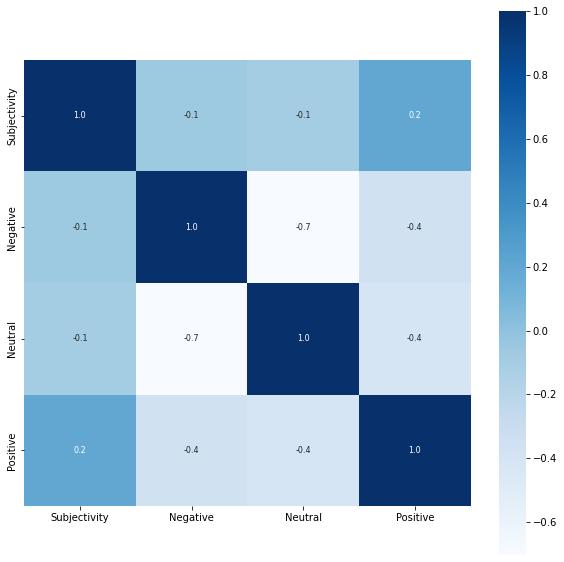

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state =42)

In [ ]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.12      0.20       199
           1       0.52      0.90      0.66       212

    accuracy                           0.52       411
   macro avg       0.52      0.51      0.43       411
weighted avg       0.52      0.52      0.43       411



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
x_train

array([[ 0.309375  ,  0.10833333,  0.056     ,  0.886     ,  0.058     ],
       [ 0.55185185, -0.20648148,  0.16      ,  0.709     ,  0.132     ],
       [ 0.38829201,  0.00633609,  0.265     ,  0.619     ,  0.116     ],
       ...,
       [ 0.23271605,  0.03159371,  0.18      ,  0.734     ,  0.086     ],
       [ 0.36648485, -0.06557576,  0.23      ,  0.706     ,  0.063     ],
       [ 0.34876263, -0.03840909,  0.203     ,  0.744     ,  0.052     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
x_test

array([[ 1.00420273,  0.21823901, -0.46765293,  0.56786299, -0.14977536],
       [ 0.70433704, -1.80657403,  0.22584838,  0.56786299, -1.04252426],
       [ 1.97896592,  2.41722348, -2.23993406,  0.53039576,  2.2060898 ],
       ...,
       [ 0.2157962 ,  0.10710489,  0.03320913,  0.77393271, -1.06732285],
       [ 0.33879795, -0.45903815,  1.13125287, -0.78095706, -0.42255975],
       [ 1.13154407,  0.49308308,  0.99640539, -0.08781342, -1.16651717]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
predicted = classifier.predict(x_test)
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
from sklearn import metrics
predicted = classifier.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.5233918128654971


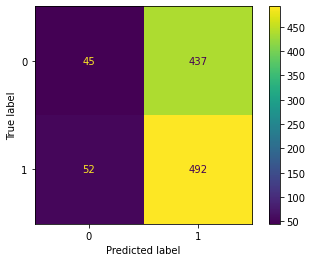

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
import matplotlib.pyplot as plt
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predicted, labels=classifier.classes_)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.46      0.09      0.16       482
           1       0.53      0.90      0.67       544

    accuracy                           0.52      1026
   macro avg       0.50      0.50      0.41      1026
weighted avg       0.50      0.52      0.43      1026



D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


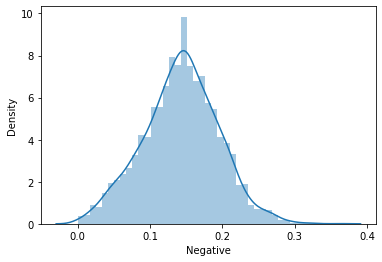

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


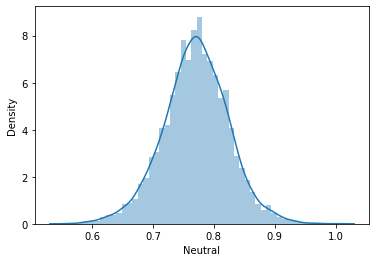

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


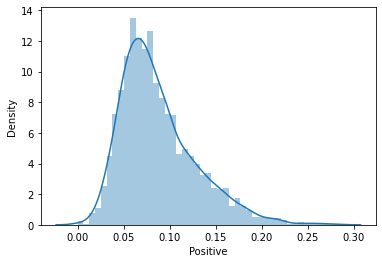

In [ ]:
def distplots(col):
    sns.distplot(df2[col])
    plt.show()
for i in list(df2.columns)[1:]:     #removed the first part as it is ID #rather than taking each column one by one , we will traverse
    distplots(i)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


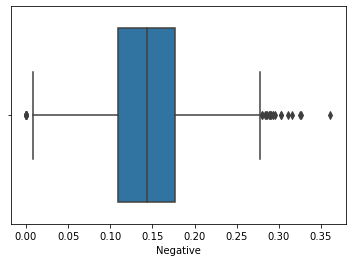

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


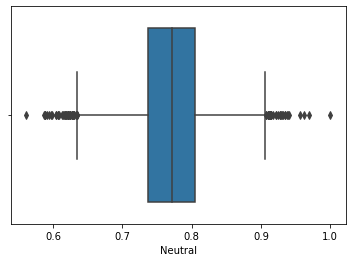

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


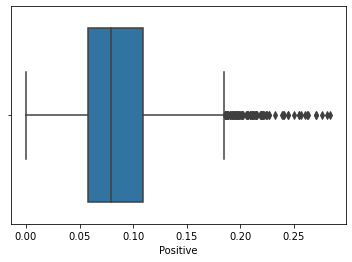

In [ ]:
def boxplots(col):
    sns.boxplot(df2[col])
    plt.show()
for i in list(df2.select_dtypes(exclude=["object"]).columns)[1:]:   #we used this command to exclude objects
    boxplots(i)

In [ ]:
#apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier2=DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
#prediction
y_pred2=classifier2.predict(x_test)
y_pred2

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
#Accuracy
accuracy_score = metrics.accuracy_score(y_pred2, y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.4951267056530214


In [ ]:
#Apply K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn5=KNeighborsClassifier(n_neighbors=5)
knn=model_knn5.fit(x_train,y_train)

In [ ]:
#Predicting Test Set N=5
pred_knn5=model_knn5.predict(x_test)
#Accuracy
accuracy_SVM=metrics.accuracy_score(y_test,pred_knn5)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.4951267056530214


In [ ]:
#Apply Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
bnb=model.fit(x_train,y_train)
#Predicting test set
pred_bnb=model.predict(x_test)
#Accuracy
accuracy_BNB=metrics.accuracy_score(pred_bnb,y_test)
print("Accuracy Score: ", accuracy_BNB)

Accuracy Score:  0.5048732943469786


In [ ]:
#Similarly apply SVM
from sklearn.svm import SVC
model_svm=SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
#Prediction
y_pred5=model_svm.predict(x_test)
#Accuracy
accuracy_svc=metrics.accuracy_score(y_test,y_pred5)
print("Accuracy Score: ",accuracy_svc)

Accuracy Score:  0.5331384015594542


In [ ]:
#Apply RandomForest criteria-entropy
from sklearn.ensemble import RandomForestClassifier

classifier4=RandomForestClassifier(n_estimators = 1000, criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
#Prediction
y_pred4=classifier4.predict(x_test)
#Accuracy
accuracy_RFE=metrics.accuracy_score(y_test,y_pred4)
print("Accuracy Score: ", accuracy_RFE)

Accuracy Score:  0.5097465886939572


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train,y_train)
y_pred6 = classifier.predict(x_test)
accuracy_LR = metrics.accuracy_score(y_test,y_pred6)
print("Accuracy Score: ", accuracy_RFE)

Accuracy Score:  0.5097465886939572
